# Introduction to Stochastic Gradient Descent
## May, 2024
## A hands-on notebook by Fariman.AA and Kiani.M


### Introduction, Whats gradient descent algorithm?

Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. Gradient descent in machine learning is simply used to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible.

The Gradient Descent (GD) algorithm begins by initializing the weights (w) and bias (b) with random values. Subsequently, the algorithm enters an iterative phase where it iteratively updates the weights and bias in a step-wise manner. To achieve this update, the algorithm leverages the gradient function. This function calculates the gradients of the cost function with respect to the weights and bias for data points. By incorporating this gradient information, the algorithm aims to minimize the cost function.

There are three popular types of gradient descent that mainly differ in the amount of data they use: 
* Batch Gradient Descent: This method is also known as vanilla gradient descent, calculates the error for each example within the training dataset. Still, the model is not changed until every training sample has been assessed. 

* Stochastic Gradient Descent: This method (SGD) changes the parameters for each training sample one at a time for each training example in the dataset. 

* Mini-Batch Gradient Descent: Mini-batch gradient descent is a combination of the concepts of SGD and batch gradient descent. 

Given our primary focus on Stochastic Gradient Descent (SGD) within this notebook, let's delve deeper into its inner workings.

### Stochastic gradient descent (SGD)

Stochastic Gradient Descent (SGD) is a variant of the gradient descent algorithm that is used for optimizing machine learning models. SGD utilizes a randomly chosen subset of the training data, referred to as a mini-batch, to compute the gradient of the cost function in each iteration.

Importing randomness into the optimization process, leading to a noisier convergence path compared to methods using the entire dataset but the path itself is not the primary concern. As long as SGD converges to a sufficiently good minimum . The benefits of faster training times can outweigh the noisier path.

The main advantage of SGD is its computational efficiency, especially when dealing with large datasets. The computational cost per iteration is significantly reduced compared to traditional gradient descent methods that require processing the entire dataset.

Stochastic gradient descent algorithm has 3 key steps:
1. Initialization and setting parameters
3. Stochastic Gradient Descent Loop (Shuffling - Iterating - Computing the gradient - Updating parameters - Evaluating convergence)
4. Return Optimized Parameters

We will delve into a more detailed explanation of these steps later in this notebook.

### Why we use Stochastic gradient descent (SGD)?

There are a few downsides of the gradient descent algorithm. We take a closer look at the amount of computation in each iteration of the algorithm.

Consider we have 10,000 data points and 10 features. We need to compute the derivative of this function with respect to each of the features, so in effect we will be doing 10000 * 10 = 100,000 computations per iteration. That is pretty much an overhead and hence gradient descent is slow on large amount of data.

Fortunately, Stochastic Gradient Descent (SGD) offers a solution to this challenge.

**Advantages of stochastic gradient descent:**
1. Computational efficiency
2. Faster detection of issues
3. Performance Monitoring
4. Scalability for Large Datasets, etc...


### Stochastic gradient descent algorithm implementation in Python



In this section of the notebook, we present an implementation of the Stochastic Gradient Descent (SGD) algorithm in Python. The implementation leverages the NumPy library, so first we import NumPy. Also we will use matplotlib library in order to visualize the data throughout this notebook.

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

We define few hyperparameters that influence the SGD optimization process.

* learning_rate: This parameter controls the step size taken in each iteration.
* epochs: This parameter specifies the number iterations.
* batch_size: This parameter determines the number of data samples used for updating values in each iteration.
* tolerance: This parameter defines the convergence criterion .
* weights: This variable represents the weight associated with the model $ (y = weight * x + bias) $.
* bias: This variable represents the bias associated with the model $ (y = weight * x + bias) $ .
* mses = This variable stores different MSE values in different iterations.

In [2]:
learning_rate = 0.01
epochs = 1000
batch_size = 32
tolerance = 1e-3
weights = None
bias = None
mses = {}

We proceed by defining a predict function. This function takes an input vector, denoted by X, and returns a predicted output value, denoted by Y. The prediction is computed using the linear regression equation Y = w * X + b, where w represents the weight vector and b represents the bias.

In [3]:
# Linear regression equation, y = w * x + b
def calculate(X):
  return np.dot(X,weights) + bias

We now define the cost function, a significant advantage of SGD lies in its flexibility regarding the choice of cost function. The code can adapt to various cost functions. In this instance, we have opted for the Mean Squared Error (MSE) cost function.

In [4]:
# loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

Lets define our gradient function. The gradient function calculates the gradients of the cost function (which we'll assume is MSE in this case) with respect to the weights (w) and the bias (b) for a given batch of data (X_batch, y_batch).

In [5]:
# Return gradient_weights (partial derivative with respect to weights) and
# griadient_bias (partial derivative with respect to bias)
def gradient(X_batch, y_batch):
    y_pred = calculate(X_batch)
    error = y_pred - y_batch
    gradient_weights = np.dot(X_batch.T, error) / X_batch.shape[0]
    # we dont use mean_square_error function here for calculatin gradient bias
    # becuse we have error defiend earlier for returning gradient_weights
    gradient_bias = np.mean(error)
    return gradient_weights, gradient_bias

We now introduce the SGD function, this function follows an structure:
* Initialization: The function begins by initializing the weights (w) and bias term (b) with random values.
* Iteration: The core of the SGD function lies within the iterative loop.
* Random batch selection: Within each iteration, a random subset of data points (N) is selected from the dataset.

* Gradient update: This function is utilized to calculate the gradients of the cost function with respect to the weights and bias term for the current batch.

* Weight and Bias Update: This function updates the weights and bias term according cost function minimization.

* Termination: The iteration loop terminates when the maximum number of epochs has been reached or convergence criterion is satisfied.


In [6]:
def SGD(X, y):
    n_samples, n_features = X.shape
    global weights
    weights = np.random.randn(n_features)
    global bias
    bias = np.random.randn()

    for epoch in range(epochs):
      # np.random.permutation randomly permute a sequence
      indices = np.random.permutation(n_samples)
      X_shuffled = X[indices]
      y_shuffled = y[indices]

      for i in range(0, n_samples, batch_size):
          X_batch = X_shuffled[i:i+batch_size]
          y_batch = y_shuffled[i:i+batch_size]
          gradient_weights, gradient_bias = gradient(X_batch, y_batch)
          weights -= learning_rate * gradient_weights
          bias -= learning_rate * gradient_bias

      if epoch % 50 == 0:
          y_pred = calculate(X)
          loss = mean_squared_error(y, y_pred)
          mses[epoch] = loss
          print("Epoch: "+str(epoch) +" MSE: "+str(loss))

      if np.linalg.norm(gradient_weights) < tolerance:
          print("The algorithm reached convergence.")
          break

    return weights, bias

### Lets review a simple example of SGD

To illustrate the concepts discussed, let's consider a simple example. We begin by generating a set of random data points, which will be visualized to provide a representation of the problem we aim to address.

In [7]:
# Create random dataset with 100 rows and 2 columns
X = np.random.randn(100, 2)
# create random target value 
y = np.random.randn(100)

Lets plot these points.

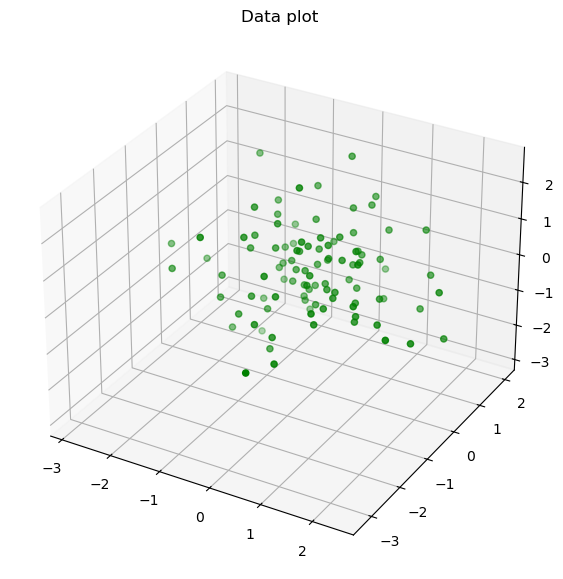

In [8]:
# Creating dataset
x = X[:, 0]
z = X[:, 1]

 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, z, y, color = "green")
plt.title("Data plot")
 
# show plot
plt.show()

We now proceed by calling the SGD function. The goal is to find the parameter values that minimize the cost function.

In [9]:
w,b = SGD(X,y)
print('Best Weight:' + str(w))
print('Best Bias:' + str(b))
# Predict using predict method from model
y_pred = w*X+b
#y_pred

Epoch: 0 MSE: 3.4790366526607137
Epoch: 50 MSE: 0.9178161761264307
Epoch: 100 MSE: 0.8639134075183885
Epoch: 150 MSE: 0.863972156467223
Epoch: 200 MSE: 0.8646016401147384
Epoch: 250 MSE: 0.8640314672664273
Epoch: 300 MSE: 0.8638778364158967
Epoch: 350 MSE: 0.8644660005064921
Epoch: 400 MSE: 0.8641691908342877
Epoch: 450 MSE: 0.864212190070809
Epoch: 500 MSE: 0.8641258779972286
Epoch: 550 MSE: 0.864211675822657
Epoch: 600 MSE: 0.8648368478893645
Epoch: 650 MSE: 0.863928687136069
Epoch: 700 MSE: 0.8641865123741411
Epoch: 750 MSE: 0.864492888009716
Epoch: 800 MSE: 0.8639189895129735
Epoch: 850 MSE: 0.8649939364902459
Epoch: 900 MSE: 0.8641701767962015
Epoch: 950 MSE: 0.8642478235870201
Best Weight:[0.06707071 0.00110904]
Best Bias:0.018593169947456967


To visualize the model, we can now proceed to plot the data points alongside the predicted linear regression line.

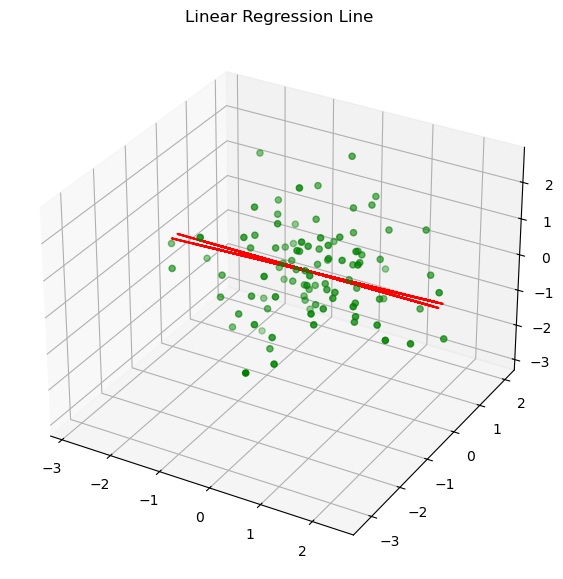

In [10]:
# Creating dataset
x = X[:, 0]
z = X[:, 1]

 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, z, y, color = "green")

plt.plot(x, y_pred, color='red')

plt.title('Linear Regression Line')


# Show the plot
plt.grid(True)
plt.show()

The change of the loss function across epochs can be visualized to assess the performance of the SGD algorithm.

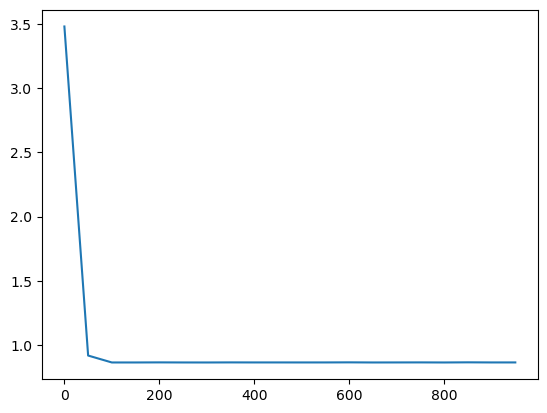

In [13]:
plt.plot(list(mses.keys()), list(mses.values()))
plt.show()

In conclusion, this exploration has provided a solid foundation for understanding the Stochastic Gradient Descent (SGD) algorithm. We have delved into the core concepts, including initialization, gradient calculation, weight and bias updates, and the iterative training process with convergence criteria. Furthermore, we have implemented a Python function to illustrate the practical application of the SGD algorithm.

Best regards.